In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



We must first load in our dataset. The data set we chose is the Vancouver crime dataset. Since the dataset is updated everyday, it is constantly changing. We chose to take data from all neighborhoods in the year 2020. To find the exact dataset that we used, you must visit our github. https://github.com/sasiburi/STAT201-Group37 is the link.

In [2]:
crime <- read_csv("https://raw.githubusercontent.com/sasiburi/STAT201-Group37/main/crimedata_csv_AllNeighbourhoods_2020/crimedata_csv_AllNeighbourhoods_2020.csv")
head(crime)

Rows: 37492 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


Now that we have loaded our data into R, we must create a new column to differentiate crimes that are violent and crimes that aren't violent.

In [3]:
violance_data <- crime %>%
                 filter(TYPE == "Offence Against a Person"| TYPE == "Assaults Against Police") %>%
                 mutate(Violent = TRUE)
              
nonviolance_data2 <- crime %>%
                     filter(TYPE != "Offence Against a Person" & TYPE != "Assaults Against Police") %>%
                     mutate(Violent = FALSE)



crime_data <- rbind(violance_data, nonviolance_data2)
head(crime_data)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Violent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>
Offence Against a Person,2020,3,16,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,8,6,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,12,23,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,7,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,11,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,20,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE


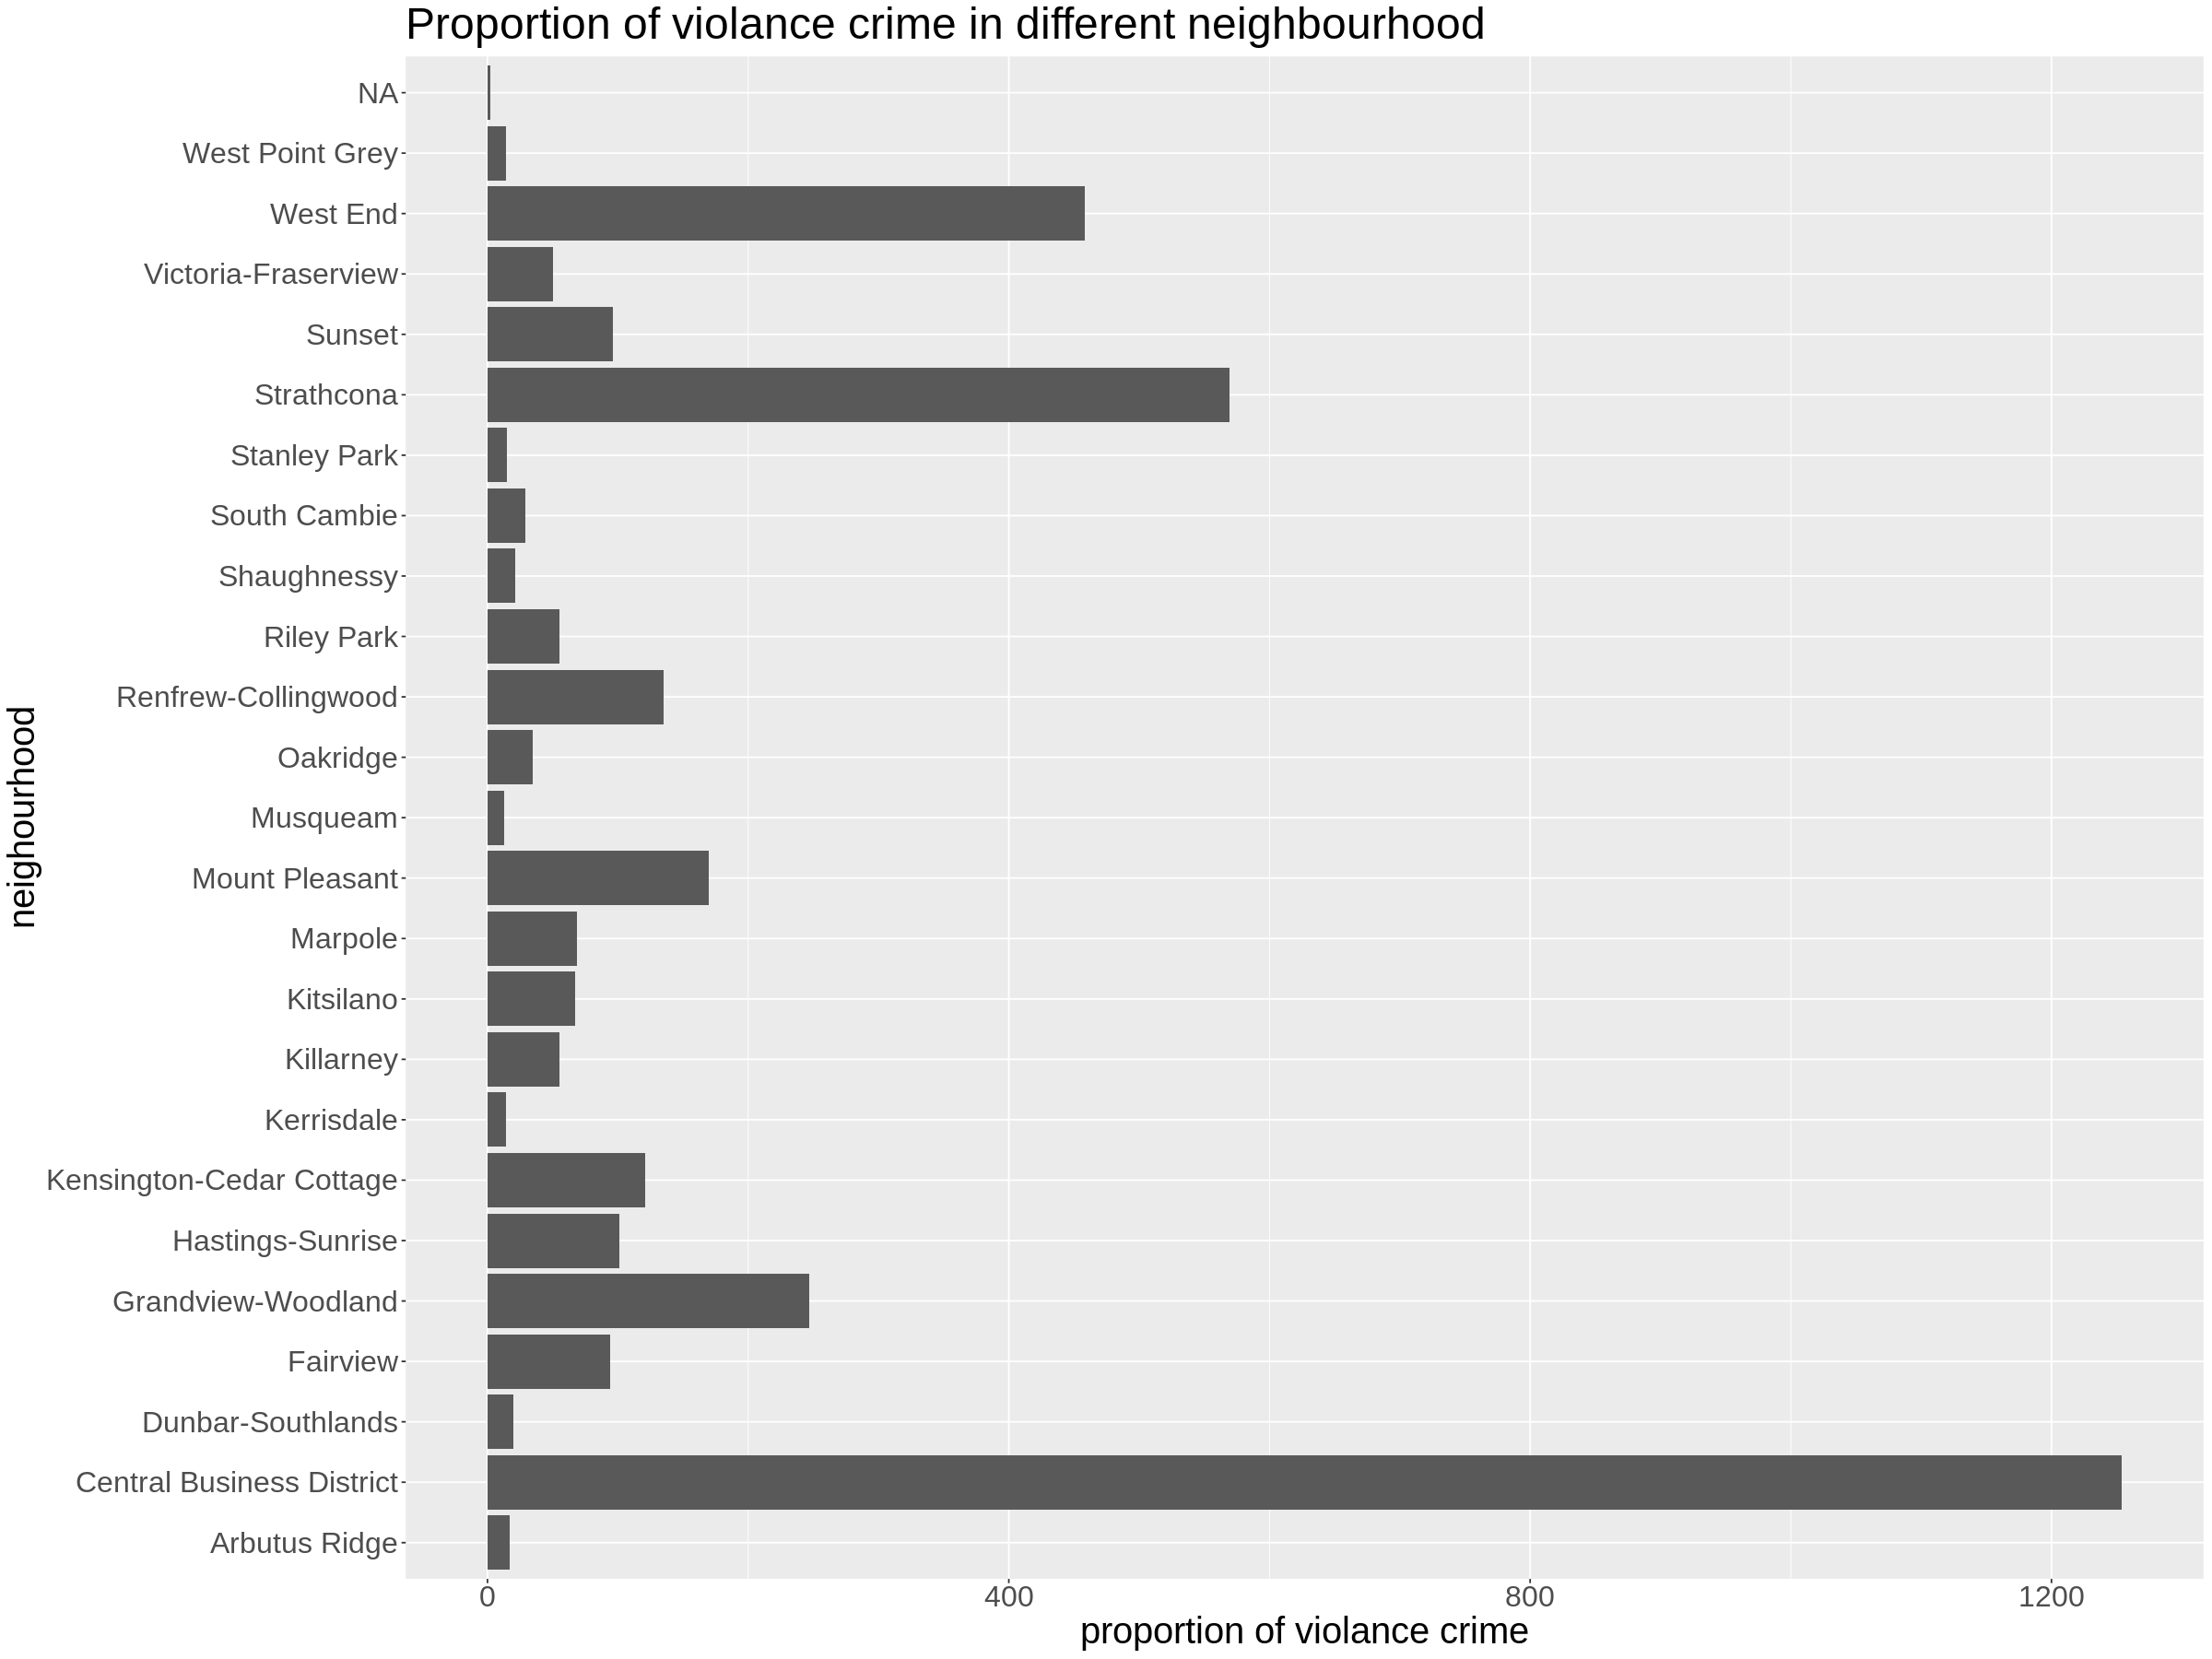

In [4]:
options(repr.plot.width = 20, repr.plot.height = 15)
prop_plot <- violance_data %>%
             ggplot(aes(x = NEIGHBOURHOOD)) +
             geom_bar() +
             xlab("neighourhood") +
             ylab("proportion of violance crime") +
             ggtitle("Proportion of violance crime in different neighbourhood") +
             coord_flip() +
             theme(text = element_text(size = 24))        
prop_plot

Now that we have created a new column to sort out whether a crime is violent or not, our first course of action is to find what proportion of crimes in vancouver are violent.

In [5]:
prop_of_violent_crimes_van <- crime_data %>%
    summarise(violent_proportion= sum(Violent=="TRUE")/37492)
prop_of_violent_crimes_van

violent_proportion
<dbl>
0.09924784


Our findings lead us to believe that roughly 10% of crimes committed in the city of Vancouver are Violent crimes.

Our next course of action is to filter the crime data of vancouver to its respective neighbourhoods so we can ultimately find the standard deviation of violent crimes amongst the neighborhoods of vancouver.

In [6]:
crime_data_prop <- select(crime_data, NEIGHBOURHOOD, Violent) %>%
                   group_by(NEIGHBOURHOOD) %>%
                   summarize(violent_proportion = sum(Violent == "TRUE")/ n())
crime_data_prop

NEIGHBOURHOOD,violent_proportion
<chr>,<dbl>
Arbutus Ridge,0.04594595
Central Business District,0.12114772
Dunbar-Southlands,0.03937008
Fairview,0.04402810
Grandview-Woodland,0.12738525
Hastings-Sunrise,0.07847708
Kensington-Cedar Cottage,0.07311178
Kerrisdale,0.03043478
Killarney,0.09337861


In [7]:
crime_data <- select(crime_data, NEIGHBOURHOOD, Violent)
arbutus_ridge <- filter(crime_data, NEIGHBOURHOOD == "Arbutus Ridge")
central_business_district <- filter(crime_data, NEIGHBOURHOOD == "Central Business District")
dunbar_southlands <- filter(crime_data, NEIGHBOURHOOD == "Dunbar-Southlands")
fairview <- filter(crime_data, NEIGHBOURHOOD == "Fairview")
grandview_woodland <- filter(crime_data, NEIGHBOURHOOD == "Grandview-Woodland")
hastings_sunrise <- filter(crime_data, NEIGHBOURHOOD == "Hastings-Sunrise")
kensington_cedar_cottage <- filter(crime_data, NEIGHBOURHOOD == "Kensington-Cedar Cottage")
kerrisdale <- filter(crime_data, NEIGHBOURHOOD == "Kerrisdale")
killarney <- filter(crime_data, NEIGHBOURHOOD == "Killarney")
kitsilano <- filter(crime_data, NEIGHBOURHOOD == "Kitsilano")
marpole <- filter(crime_data, NEIGHBOURHOOD == "Marpole")
mount_pleasant <- filter(crime_data, NEIGHBOURHOOD == "Mount Pleasant")
musqueam <- filter(crime_data, NEIGHBOURHOOD == "Musqueam")
oakridge <- filter(crime_data, NEIGHBOURHOOD == "Oakridge")
renfrew_collingwood <- filter(crime_data, NEIGHBOURHOOD == "Renfrew-Collingwood")
riley_park <- filter(crime_data, NEIGHBOURHOOD == "Riley Park")
shaughnessy <- filter(crime_data, NEIGHBOURHOOD == "Shaughnessy")
south_cambie <- filter(crime_data, NEIGHBOURHOOD == "South Cambie")
stanley_park <- filter(crime_data, NEIGHBOURHOOD == "Stanley Park")
strathcona <- filter(crime_data, NEIGHBOURHOOD == "Strathcona")
sunset <- filter(crime_data, NEIGHBOURHOOD == "Sunset")
victoria_fraserview <- filter(crime_data, NEIGHBOURHOOD == "Victoria-Fraserview")
west_end <- filter(crime_data, NEIGHBOURHOOD == "West End")
west_point_grey <- filter(crime_data, NEIGHBOURHOOD == "West Point Grey")
# head(arbutus_ridge)
# head(central_business_district)
# head(dunbar_southlands)
# head(fairview)
# head(west_point_grey)